In [46]:
(require '[acausal.core :as a]
         '[acausal.random :as ar]
         '[clojure.repl :refer [doc]]
         '[incanter.charts]
         :reload)

In [90]:
(def num-vars 10)
(def p-edge 0.25)
(def p-confounding 0.8)
(def num-effect 5)
(def num-do 5)

(def some-models
    (take 1000
          (repeatedly #(ar/josh-model num-vars p-edge p-confounding))))

(def some-queries
    (take 1000 (repeatedly #(ar/gen-query num-vars num-effect num-do))))

(first some-queries)

#acausal.core.Query{:p #{:n_10 :n_2 :n_9 :n_3 :n_7}, :do #{:n_1 :n_5 :n_4 :n_8 :n_6}, :given #{}}

In [91]:
(ar/percent-true
    (map #(a/identifiable? (first some-models) %) some-queries))

31/500

In [77]:
(let [n 20]
  (->
    (incanter.charts/scatter-plot
        (range (dec n))
        (map #(average (map ar/percent-nontrivial-id
                            (gen-models 100 n % 0.5)))
             (range (dec n))))
    
    (.createBufferedImage 600 400)))

CompilerException java.lang.RuntimeException: Unable to resolve symbol: average in this context, compiling:(/tmp/form-init1605667720668274947.clj:5:15) 


class clojure.lang.Compiler$CompilerException: 

In [63]:
(average (map percent-id-nontrivial (gen-models 1000 15 13 0.5)))

327/500

In [102]:
(identifiable?
    (nth random-semimarkovian-models 3)
    (q [:n_11] :do [:n_15]))

true

In [10]:
(defn all-singleton-queries
    "All queries of the form (q i :do j) for i not= j"
    [nodes]
    (for [i nodes
          j nodes
          :when (not= i j)]
          (q [i] :do [j])))

#'user/all-singleton-queries

In [8]:
(defn nontrivial-singleton-queries
    [nodes]
    (for [i nodes
          j nodes
          :when (< (compare i j) 0)]
          (q [i] :do [j])))

#'user/nontrivial-singleton-queries

In [17]:
(defn percent-identifiable
    [m]
    (let [queries (all-singleton-queries (a/verticies m))]
        (/
            (->>
                queries
                (map #(identifiable? m %))
                (filter identity)
                count)
            (count queries))))

CompilerException java.lang.RuntimeException: Unable to resolve symbol: all-singleton-queries in this context, compiling:(/tmp/form-init2786637632494356736.clj:3:19) 


class clojure.lang.Compiler$CompilerException: 

In [11]:
(defn percent-id-nontrivial
    [m]
    (let [queries (nontrivial-singleton-queries (a/verticies m))]
        (/
            (->>
                queries
                (map #(identifiable? m %))
                (filter identity)
                count)
            (count queries))))

#'user/percent-id-nontrivial

In [ ]:
(defn multi-query
    [nodes]
    (for [i nodes]))

In [28]:
(a/identifiable? (first random-semimarkovian-models) (a/q [:n_13] :do [:n_4]))

false

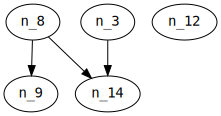

In [27]:
(first random-semimarkovian-models)